#<font color='navy' size=10pt >Reinforcement Learning</font>

In [1]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

## <font color='blue'> Motivation

If we would like to design a robot or a machine that makes autonomous decisions how can we possibly achieve that?

The Challenge: There are so many choices to be made (paths, courses of action, etc.), so which one is worth pursuing and how the machine can be programmed to start learning how to make good choices?

One possible answer is to consider what the machine learning community refers to as "Bandit Algorithms" for artificial intelligence.

Formalization: N-armed bandit problem that can be solved with an Upper Confidence Bound algorithm.

Real world examples:
    - Compare 5 different advertisements (“thing you spend money on”) to see which has the best return.
    - Compare three different studying habits to see which is better.

An advantage of reinforcement learning is that it focuses on getting a better answer as you go (learn more), so you can hypothetically make a better choice earlier compared to a classical randomized trial.

However as we will see, there is no magic ! Everything comes at a price..

Intuitive Framework : Slot Machines

## <font color='blue'> Terminology

**Agent** - Algorithm picking slot machines.

**Actions**  - Pick a slot machine (say between 1-20 if we had a total of 20 different slot machines)

**Discount** - No discounting in this example - every dollar is equal.

**Environment** - Unknown probabilities of return from machines.

**States** - state(0) = no knowledge about machines; at each state(n) you have an increasing amount of information about the machines.

**Reward** - How much you get back each time you pull a lever.

**Policy** - The upper confidence bound selection strategy is our policy.

**Expected Value** - The long-term expected result of a given policy. Our algorithm doesn’t explicitly use this, only the immediate reward expectation.  Implicit in the UCB approach.

Big ideas and theoretical concepts applied in the algorithm: Central Limit Theorem, Confidence Intervals and the Chernoff-Hoeffding Inequality



## <font color='blue'> Central Limit Theorem

If X is a random variable and we consider the sampling of X with sample sizes greater than 30 then the distribution of the sample means is almost normally distributed.

$$\text{If the sample size }n\,\, \text{increases, then } \bar{x}\sim \mathcal{N}\left(\mu_X,\frac{\sigma_X}{\sqrt{n}}\right)$$

where $\bar{x}$ represents the sample mean.

Big Idea: the random variable X may follow some unknown distribution however, if we consider sampling from X with sample sizes that are big, then the distribution of the corresponfing sample means is almost normal.

## Confidence intervals 

The idea is to "trap" the value of a population mean inside an interval built around a sample mean, for example:


<figure>
<center>
<img src='https://drive.google.com/uc?id=1Vc31EI2dhYA9J-exOEoJQAcaygghhZHV'width='800px'/>
<figcaption>Example of Confidence Intervals</figcaption></center>
</figure>




In the picture above we had an intuitive replresentation of this fact, the true value of the mean is "trapped" inside most of the confidence intervals constructed around sample means from different simple random samples drawn from the same population.

Am more detailed picture representing this idea is the following, showing how a 95% confidence interval is working:


<figure>
<center>
<img src='https://drive.google.com/uc?id=1cmPYiZQ4mM139f1DRGMDDKkYP02tpxQ1'width='800px'/>
<figcaption>A 95% Confidence Interval</figcaption></center>
</figure>


## <font color='blue'> Chernoff Bound

This concept helps us determine a rough estimate for the upper bound of the confidence intervals "on-the-fly".

**Theorem** Let $X=\sum_{i=1}^{n}X_i,$ where $X_i=1$ with probability $p_i$ and $X_i=0$ with probability $1-p_i$, and all $X_i$ are independent. Let $\mu=\mathbb{E}(X)=\sum_{i=1}^{n}p_i.$ Then

i) **(Upper Tail)** $\large \mathbb{P}(X\geq(1+\delta)\mu)\leq e^{-\frac{\delta^2}{2+\delta}\mu}$

ii) **(Lower Tail)** $\large \mathbb{P}(X\leq(1-\delta)\mu)\leq e^{-\frac{\mu\delta^2}{2}}$

A Chernoff bound can be determined in a more general setup:
<figure>
<left>
<img src='https://drive.google.com/uc?id=1YO2_oBFT15BFR-VPcaMIRfxwg-9Ad46w'width='800px'/>
<figcaption></figcaption></center>
</figure>



<figure>
<left>
<img src='https://drive.google.com/uc?id=1X4atCKFDEaC0dLe2X4SJHXLEZt3Zg8Al'width='800px'/>
<figcaption></figcaption></center>
</figure>


This sounds really complicated but in simple words, it says that by playing all "slot machines" a couple of times we are able to approximate the one that has a better return value by looking at the upper bounds for the different confidence intervals. So, in conclusion, learning comes at a price...

## <font color='blue'> The Bandit Algorithm (or Upper-Confidence-Bound Action Selection)

If we index the different slot machines by $i$ where $1\leq i\leq n$ and we assume that the $i^{th}$ machine was played $T_i$ times then the upper bound estimate for the confidence interval for the $i^{th}$ machine is 

$$\bar{X_i} + c\sqrt{\frac{\ln(t)}{T_i}}$$

where $t$ represents the total number of times any game was played so far.

As a more intuitive example we can imagine a game with five slot machines:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1-NtZ-q8Vs1gnQfYDzBqBKCHAxSjhUmJg'width='800px'/>
<figcaption></figcaption></center>
</figure>


<figure>
<center>
<img src='https://drive.google.com/uc?id=1eFMAj_WeOG0ObWhsdFWACahrD1OsER8K'width='800px'/>
<figcaption></figcaption></center>
</figure>

Critical thinking question: Which machine will be picked in the end by applying the Bandit Algorithm?

In [2]:
import random
import numpy as np

def playSlots(machine):

       
    if(machine == 1):
        return round(random.gauss(0,1),2) #normal distribution mean 0 sigma 1
    
    if(machine == 2):
        return round(random.uniform(0.5,1.5),2) #unifrom between .5 and 1.5
    
    if(machine>=3 and machine <=10):
        return round(random.triangular(0,0.5,1),2) #between 0 and 1 height at .5
    
    if(machine >=11 and machine <=14):
        return round(random.triangular(0.5,1,1.5),2) #between .5,1.5 height 1
    
    if(machine == 15):
        return round(random.triangular(0.8,1,3.0),2) #between .8, 3 height 1 ** this is the lucky machine
    
    if(machine >= 16 and machine <= 20):
        return round(random.uniform(0,1.1),2) #uniform between 0,1.1

    if(machine >20):
        print("There are only 20 slot machines!  You've gone awry.")

In [3]:
rv = []
for i in range(1000):
  rv.append(round(random.triangular(0,2,1),2))


(array([ 38., 100., 138., 209., 225., 166.,  80.,  44.]),
 array([0.03   , 0.26625, 0.5025 , 0.73875, 0.975  , 1.21125, 1.4475 ,
        1.68375, 1.92   ]),
 <BarContainer object of 8 artists>)

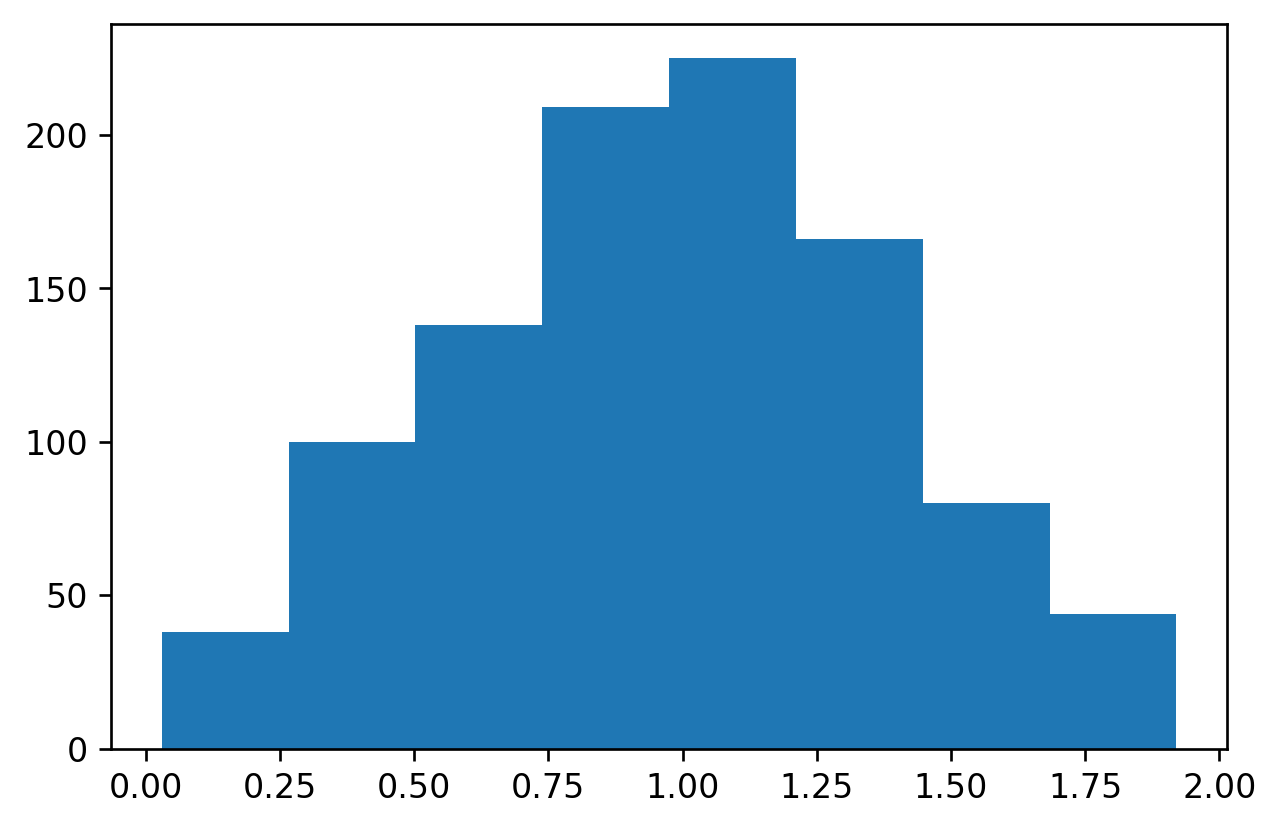

In [4]:
import matplotlib.pyplot as plt
plt.hist(rv,bins=8)

In [5]:
cash = 10
spin = 1
while(cash>1):
    print("Spin: " + str(spin))
    winnings = playSlots(machine=1)
    print("I won! I got " + str(winnings))
    cash = (cash-1) + winnings
    print("I now have $" + str(cash))
    spin = spin +1

Spin: 1
I won! I got 0.15
I now have $9.15
Spin: 2
I won! I got -0.06
I now have $8.09
Spin: 3
I won! I got -1.26
I now have $5.83
Spin: 4
I won! I got 0.46
I now have $5.29
Spin: 5
I won! I got -2.12
I now have $2.17
Spin: 6
I won! I got 1.29
I now have $2.46
Spin: 7
I won! I got 1.63
I now have $3.09
Spin: 8
I won! I got 1.45
I now have $3.54
Spin: 9
I won! I got -0.32
I now have $2.22
Spin: 10
I won! I got 0.13
I now have $1.35
Spin: 11
I won! I got -0.18
I now have $0.1700000000000001


In [6]:
N = 2500 #how many plays
d = 20
machine_record = []
award_record = []
balance = 1000.0
for n in range(N):
    machine_choice = random.randrange(1,d+1)
    machine_record.append(machine_choice)
    cash_reward = playSlots(machine = machine_choice)
    award_record.append(cash_reward)
    balance = (balance - 1.0) + cash_reward

In [7]:
balance

82.8399999999978

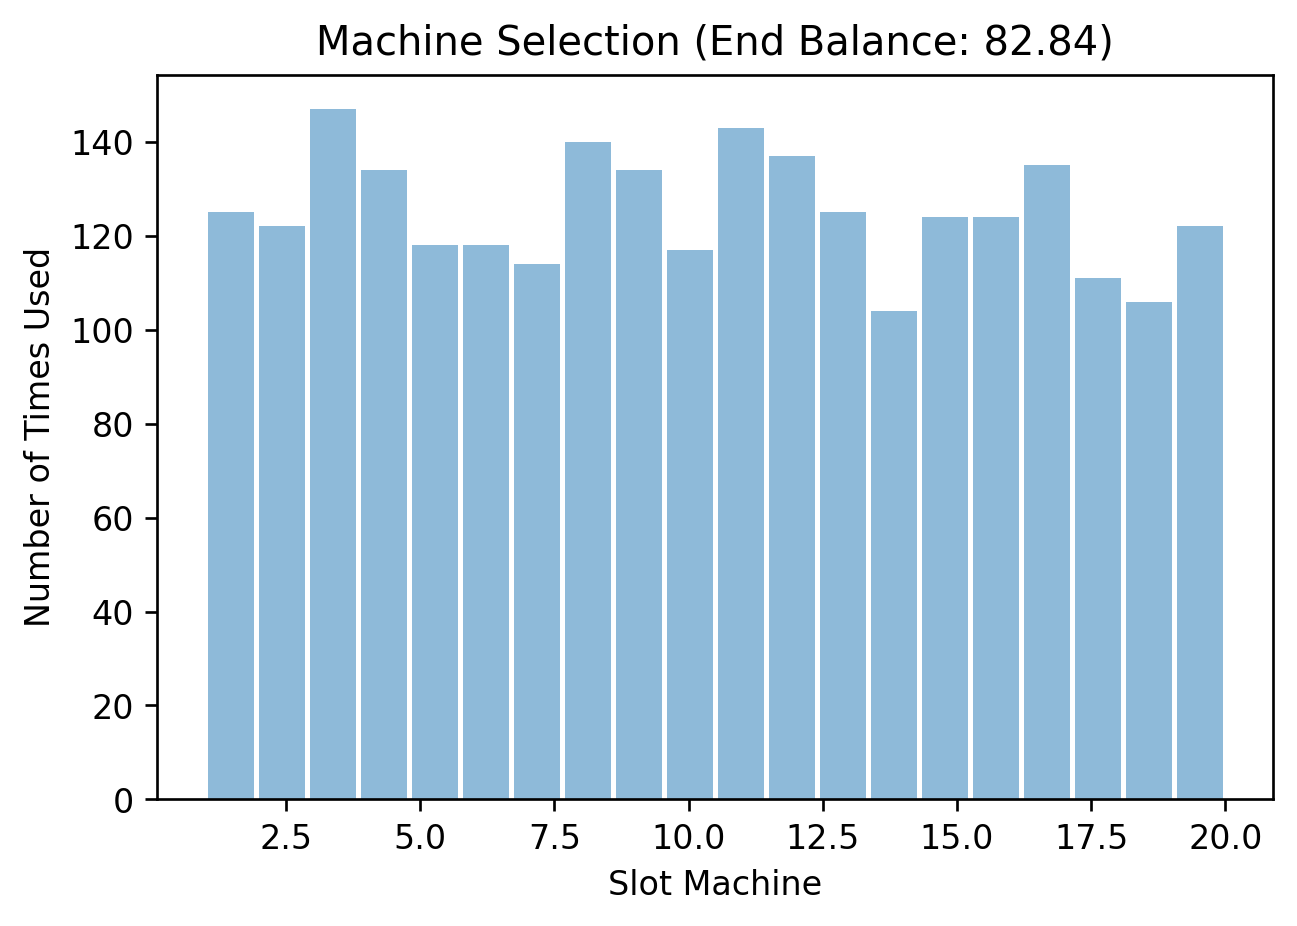

In [8]:
plt.hist(machine_record,bins=20,rwidth=0.9, alpha=0.5)
plt.title("Machine Selection (End Balance: "+ str(round(balance,2))+")")
plt.xlabel("Slot Machine")
plt.ylabel("Number of Times Used")
plt.show()

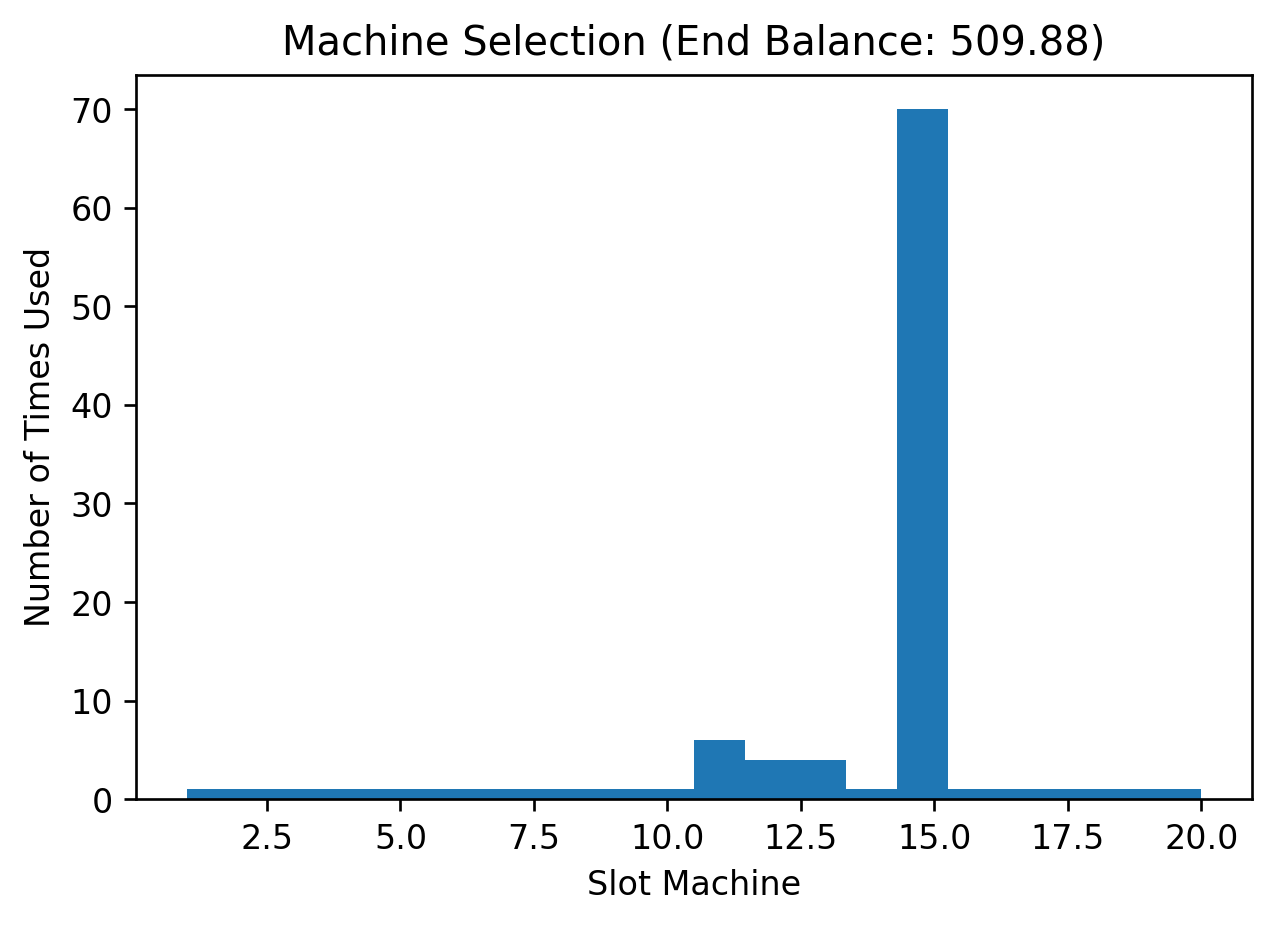

In [9]:
N = 100
d = 21
machine_record = []
award_record = []
balance = 500.0

c = 0.2
number_of_selections = [0] * d
sum_of_rewards = [0] * d

for n in range(N):
    machine_choice = 1
    max_upper_bound = 0
    for i in range(1,d):
        if(number_of_selections[i] > 0):
            average_reward = sum_of_rewards[i]/number_of_selections[i]
            epsilon_i = c*np.sqrt(np.log(n)/number_of_selections[i])
            upper_bound = average_reward + epsilon_i
        else:
            upper_bound = 1e200

        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            machine_choice = i

    machine_record.append(machine_choice)
    number_of_selections[machine_choice] = number_of_selections[machine_choice] + 1
    award = playSlots(machine=machine_choice)
    sum_of_rewards[machine_choice] = sum_of_rewards[machine_choice] + award
    balance = balance - 1 + award

plt.hist(machine_record, bins=20)
plt.title("Machine Selection (End Balance: " + str(round(balance,2)) + ")")
plt.xlabel("Slot Machine")
plt.ylabel("Number of Times Used")
plt.show()